In [1]:
using Crystalline, MPBUtils, JLD2, LinearAlgebra, StaticArrays, SymmetryBases, PyPlot, DelimitedFiles, PrettyTables, Brillouin
using PyCall
np = pyimport("numpy")
include("plotting_utilities.jl")
cm = 1/2.54;

In [2]:
loaded_data_sg16 = load("./symeigs/sg16-fillings-data.jld2")
loaded_data_sg10 = load("./symeigs/sg10-fillings-data.jld2")
loaded_data_sg2 = load("./symeigs/sg2-fillings-data.jld2");

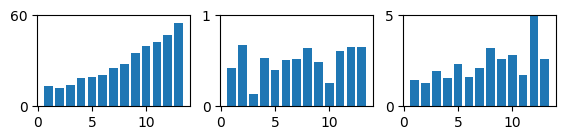

(PyObject[PyObject <matplotlib.axis.YTick object at 0x7f6abfaf4370>, PyObject <matplotlib.axis.YTick object at 0x7f6abfaecf10>], PyObject[PyObject Text(0, 0, '0'), PyObject Text(0, 5, '5')])

In [6]:
figure(figsize=(17cm, 3cm))
subplot(1, 3, 1)
bar(1:13, [x*100 for x in [loaded_data_sg2["stable_count"][("tm", id)][1] / 
                loaded_data_sg2["total_count"][("tm", id)][1] for id in 1:13]]);
ylim(0, 50)
yticks([0, 60])
subplot(1, 3, 2)
bar(1:13, [x*100 for x in [loaded_data_sg10["stable_count"][("tm", id)][1] /
                loaded_data_sg10["total_count"][("tm", id)] for id in 1:13]]);
ylim(0, 1)
yticks([0, 1])
subplot(1, 3, 3)
bar(1:13, [x*100 for x in [loaded_data_sg16["stable_count"][("tm", id)][1] /
                loaded_data_sg16["total_count"][("tm", id)] for id in 1:13]]);
ylim(0, 5)
yticks([0, 5])

#savefig("stable_wrt_fillings_tm.pdf")

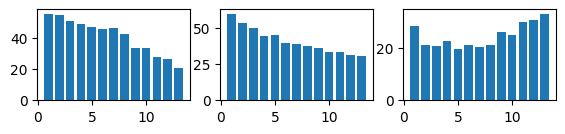

In [10]:
figure(figsize=(17cm, 3cm))
subplot(1, 3, 1)
bar(1:13, [x*100 for x in [loaded_data_sg2["stable_count"][("te", id)][1] / 
                loaded_data_sg2["total_count"][("te", id)] for id in 1:13]]);
#ylim(0, 5)
#yticks([0, 5])
subplot(1, 3, 2)
bar(1:13, [x*100 for x in [loaded_data_sg10["stable_count"][("te", id)][1] /
                loaded_data_sg10["total_count"][("te", id)] for id in 1:13]]);
#ylim(0, 5)
#yticks([0, 5])
subplot(1, 3, 3)
bar(1:13, [x*100 for x in [loaded_data_sg16["stable_count"][("te", id)][1] / 
                loaded_data_sg16["total_count"][("te", id)] for id in 1:13]]);
#ylim(0, 3)
#yticks([0, 3])
#savefig("stable_wrt_fillings_te.pdf")

In [14]:
# Test making more coarse-grained data

In [15]:
collect(0.2:0.05:0.8)

13-element Vector{Float64}:
 0.2
 0.25
 0.3
 0.35
 0.4
 0.45
 0.5
 0.55
 0.6
 0.65
 0.7
 0.75
 0.8

In [41]:
#coarse_grained_filling_range = [(2n-1):(2n) for n in 1:6]
coarse_grained_filling_range = [1:4, 5:8, 9:13]

3-element Vector{UnitRange{Int64}}:
 1:4
 5:8
 9:13

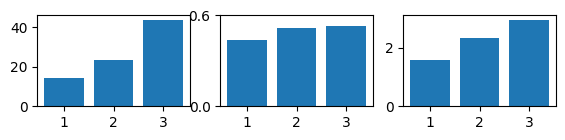

(PyObject <matplotlib.patches.Rectangle object at 0x7f6abc8bd3d0>, PyObject <matplotlib.patches.Rectangle object at 0x7f6abc8bd1c0>, PyObject <matplotlib.patches.Rectangle object at 0x7f6abc8bd8e0>)

In [65]:
figure(figsize=(17cm, 3cm))
subplot(1, 3, 1)


stable_data = loaded_data_sg2["stable_count"]
total_data = loaded_data_sg2["total_count"]
y = [sum([stable_data[("tm", id)][1] for id in coarse_grained_filling_range[i]]) for i in 1:length(coarse_grained_filling_range)] 
x = [sum([total_data[("tm", id)][1] for id in coarse_grained_filling_range[i]]) for i in 1:length(coarse_grained_filling_range)] 
bar(1:3, 100*y ./ x)


subplot(1, 3, 2)
stable_data = loaded_data_sg10["stable_count"]
total_data = loaded_data_sg10["total_count"]
y = [sum([stable_data[("tm", id)][1] for id in coarse_grained_filling_range[i]]) for i in 1:length(coarse_grained_filling_range)] 
x = [sum([total_data[("tm", id)][1] for id in coarse_grained_filling_range[i]]) for i in 1:length(coarse_grained_filling_range)] 
bar(1:3, 100*y ./ x)
ylim(0, 0.6)
yticks([0, 0.6])
subplot(1, 3, 3)
stable_data = loaded_data_sg16["stable_count"]
total_data = loaded_data_sg16["total_count"]
y = [sum([stable_data[("tm", id)][1] for id in coarse_grained_filling_range[i]]) for i in 1:length(coarse_grained_filling_range)] 
x = [sum([total_data[("tm", id)][1] for id in coarse_grained_filling_range[i]]) for i in 1:length(coarse_grained_filling_range)] 
bar(1:3, 100*y ./ x)



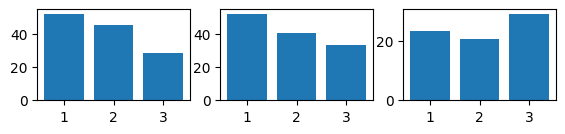

(PyObject <matplotlib.patches.Rectangle object at 0x7f6abc6ef100>, PyObject <matplotlib.patches.Rectangle object at 0x7f6abc6e2eb0>, PyObject <matplotlib.patches.Rectangle object at 0x7f6abc6ef610>)

In [67]:
figure(figsize=(17cm, 3cm))
subplot(1, 3, 1)

mode = "te"

stable_data = loaded_data_sg2["stable_count"]
total_data = loaded_data_sg2["total_count"]
y = [sum([stable_data[(mode, id)][1] for id in coarse_grained_filling_range[i]]) for i in 1:length(coarse_grained_filling_range)] 
x = [sum([total_data[(mode, id)][1] for id in coarse_grained_filling_range[i]]) for i in 1:length(coarse_grained_filling_range)] 
bar(1:3, 100*y ./ x)


subplot(1, 3, 2)
stable_data = loaded_data_sg10["stable_count"]
total_data = loaded_data_sg10["total_count"]
y = [sum([stable_data[(mode , id)][1] for id in coarse_grained_filling_range[i]]) for i in 1:length(coarse_grained_filling_range)] 
x = [sum([total_data[(mode , id)][1] for id in coarse_grained_filling_range[i]]) for i in 1:length(coarse_grained_filling_range)] 
bar(1:3, 100*y ./ x)
#ylim(0, 0.6)
#yticks([0, 0.6])
subplot(1, 3, 3)
stable_data = loaded_data_sg16["stable_count"]
total_data = loaded_data_sg16["total_count"]
y = [sum([stable_data[(mode, id)][1] for id in coarse_grained_filling_range[i]]) for i in 1:length(coarse_grained_filling_range)] 
x = [sum([total_data[(mode, id)][1] for id in coarse_grained_filling_range[i]]) for i in 1:length(coarse_grained_filling_range)] 
bar(1:3, 100*y ./ x)

